# Описание проекта:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Часть 1. Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача:**
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Часть 2. Анализ A/B-теста**

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача:**
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения;
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения;
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения;
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения;
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения;
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения;
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей;
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения;
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов;
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения;
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения;
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения;
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения;
14. Примите решение по результатам теста и объясните его. Варианты решений:
        1. Остановить тест, зафиксировать победу одной из групп.
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        3. Продолжить тест.

# Описание данных:
Данные для первой части (файл /datasets/hypothesis.csv):
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части (файл /datasets/orders.csv):
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

# Обзор данных:

Импортируем необходимые библиотеки для работы:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats

**Считывание данных и запись их в переменные:**

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') # считаем необходимый файл visits_info_short.csv сохраняем его в переменной visits
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv') # считаем необходимый файл orders_info_short.csv сохраняем его в переменной orders
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv') # считаем необходимый файл costs_info_short.csv сохраняем его в переменной costs
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

**Выведем первые 5 строк датасетов:**

In [3]:
hypothesis.head() # выведем первые 5 строк датасета hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
orders.head() # выведем первые 5 строк датасета orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head() # выведем первые 5 строк датасета visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Ознакомимся с данными, методом info():**

In [6]:
hypothesis.info() # ознакомимся с данными датасета hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
orders.info() # ознакомимся с данными датасета orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info() # ознакомимся с данными датасета visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Выводы:** походу выполнения раздела "Обзор данных" были импортированы необходимые библиотеки для работы с ними в дальнейшем. Были загружены датасеты в переменные hypothesis, orders и visitors. Также были выведены первые 5 строк каждого датасета на экран, для ознакомления с данными. После применения метода info() к каждому датасету, было обнаружено, что:
* в датасете orders строка date имеет тип данных object, необходимо перевести в тип datetime;
* в датасете visitors строка date имеет тип данных object, необходимо перевести в тип datetime;
* необходимо привести колонки к нижнему регистру, такие как: transactionId и visitorId в датасете orders.

# Предобработка данных:

**Приведение столбцов к нижнему регистру и замена пробелов на нижний знак подчеркивания:**

In [9]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
visitors.columns = [x.lower().replace(' ', '_') for x in visitors.columns.values]

In [10]:
hypothesis.columns # посмотрим на результат датасета hypothesis

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [11]:
orders.columns # посмотрим на результат датасета orders

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [12]:
visitors.columns # посмотрим на результат датасета costs

Index(['date', 'group', 'visitors'], dtype='object')

**В датасетах столбцы имеют тип данных object, которые необходимо перевести в тип datetime:**

In [13]:
orders['date'] = pd.to_datetime(orders['date']) # перевод столбца date датасета orders в тип данных datetime
visitors['date'] = pd.to_datetime(visitors['date']) # перевод столбца date датасета visitors в тип данных datetime

**Посмотрим на количество пропущенных значений в датасетах:**

In [14]:
hypothesis.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета hypothesis

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [15]:
orders.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета orders

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
visitors.isna().sum() # выведем количество пропущенных значений для каждого столбца датасета visitors

date        0
group       0
visitors    0
dtype: int64

Пропущенные значения в данных отсутствуют.

**Проверка на явные дубликаты:**

In [17]:
print('Количетво явных дубликатов в файле hypothesis:', hypothesis.duplicated().sum())

Количетво явных дубликатов в файле hypothesis: 0


In [18]:
print('Количетво явных дубликатов в файле orders:', orders.duplicated().sum())

Количетво явных дубликатов в файле orders: 0


In [19]:
print('Количетво явных дубликатов в файле visitors:', visitors.duplicated().sum())

Количетво явных дубликатов в файле visitors: 0


**Изучим данные датасета hypothesis:**

Построим гистограммы по данным столбцов:

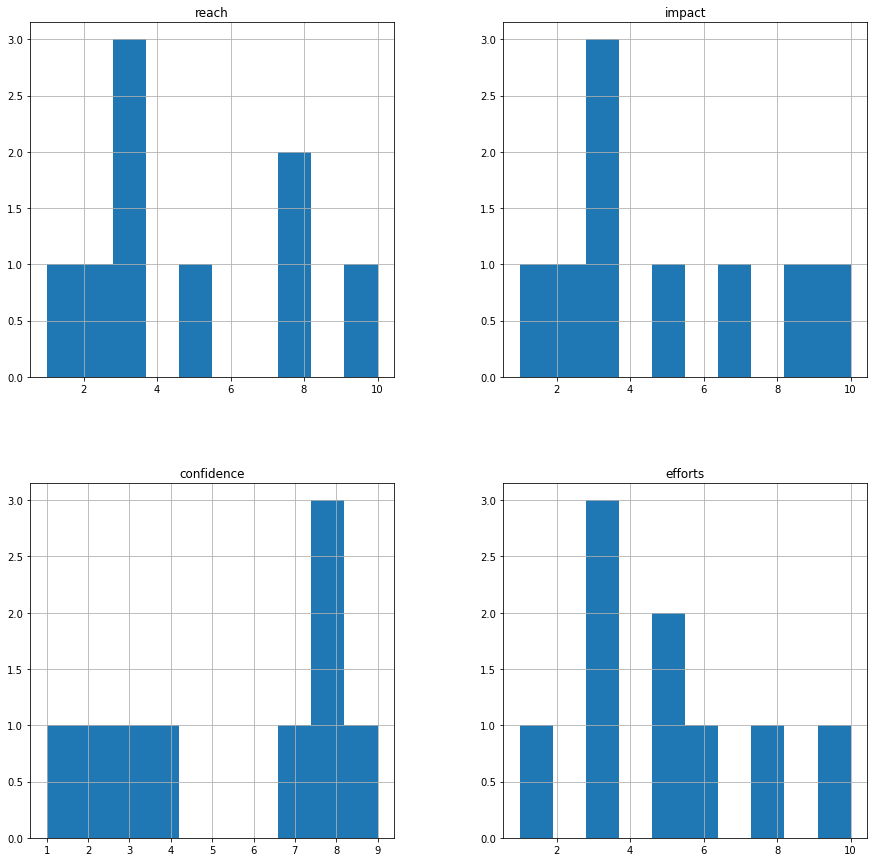

In [20]:
hypothesis.hist(figsize = (15, 15));

Посмотрим на уникальные значения столбцов датасета и их количество:

In [21]:
display(hypothesis['hypothesis'].unique()) # посмотрим уникальные значения столбца hypothesis
display(hypothesis['hypothesis'].value_counts())
display(hypothesis['hypothesis'].count())

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                 

9

In [22]:
display(hypothesis['reach'].unique()) # посмотрим уникальные значения столбца reach
display(hypothesis['reach'].value_counts())
display(hypothesis['reach'].count())

array([ 3,  2,  8,  5, 10,  1], dtype=int64)

3     3
8     2
2     1
5     1
10    1
1     1
Name: reach, dtype: int64

9

In [23]:
display(hypothesis['impact'].unique()) # посмотрим уникальные значения столбца impact
display(hypothesis['impact'].value_counts())
display(hypothesis['impact'].count())

array([10,  5,  3,  1,  2,  7,  9], dtype=int64)

3     3
10    1
5     1
1     1
2     1
7     1
9     1
Name: impact, dtype: int64

9

In [24]:
display(hypothesis['confidence'].unique()) # посмотрим уникальные значения столбца confidence
display(hypothesis['confidence'].value_counts())
display(hypothesis['confidence'].count())

array([8, 4, 7, 3, 1, 2, 9], dtype=int64)

8    3
4    1
7    1
3    1
1    1
2    1
9    1
Name: confidence, dtype: int64

9

In [25]:
display(hypothesis['efforts'].unique()) # посмотрим уникальные значения столбца efforts
display(hypothesis['efforts'].value_counts())
display(hypothesis['efforts'].count())

array([ 6, 10,  3,  8,  1,  5], dtype=int64)

3     3
5     2
6     1
10    1
8     1
1     1
Name: efforts, dtype: int64

9

**Изучим данные датасета orders:**

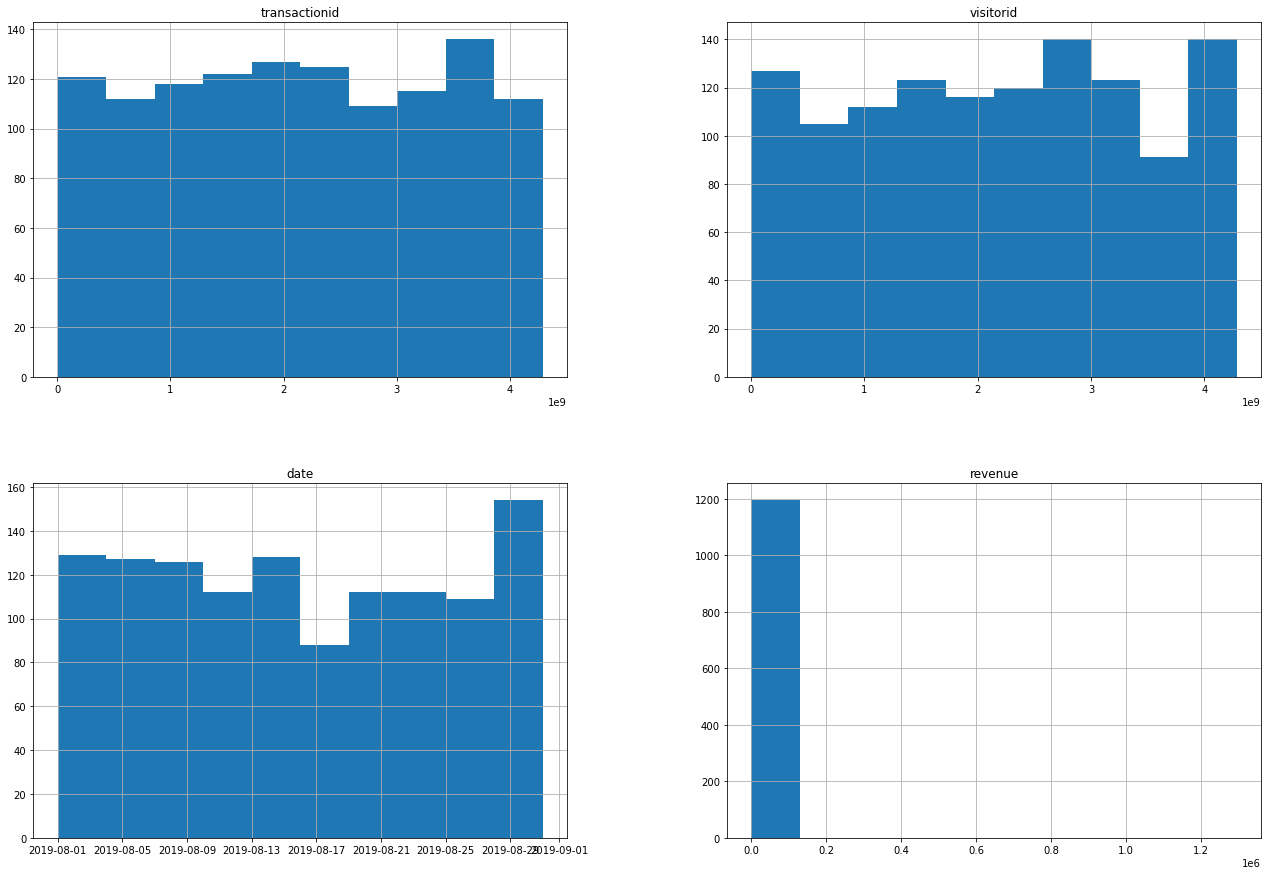

In [26]:
orders.hist(figsize = (22, 15));

In [27]:
display(orders['transactionid'].unique()) # посмотрим уникальные значения столбца transactionid
display(orders['transactionid'].value_counts())
display(orders['transactionid'].count())

array([3667963787, 2804400009, 2961555356, ..., 1807773912, 1947021204,
       3936777065], dtype=int64)

3667963787    1
4167421281    1
2875229767    1
504373597     1
2017680897    1
             ..
1853288890    1
2084190534    1
2956594374    1
3646798055    1
3936777065    1
Name: transactionid, Length: 1197, dtype: int64

1197

In [28]:
display(orders['visitorid'].unique()) # посмотрим уникальные значения столбца visitorid
display(orders['visitorid'].value_counts())
display(orders['visitorid'].count())

array([3312258926, 3642806036, 4069496402, ...,  370388673,  573423106,
       2108080724], dtype=int64)

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2524310328     1
2210805728     1
2274825520     1
1831227158     1
2108080724     1
Name: visitorid, Length: 1031, dtype: int64

1197

In [29]:
display(orders['date'].unique()) # посмотрим уникальные значения столбца date
display(orders['date'].value_counts())
display(orders['date'].count())

array(['2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-02T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-24T00:00:00.000000000', '2019-08-03T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-28T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-26T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
       '2019-08-04T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
       '2019-08-30T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-21T00:00:00.000000000',
       '2019-08-08T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-31T00:00:00.000000000', '2019-08-11

2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-06    46
2019-08-15    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-22    41
2019-08-09    41
2019-08-26    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

1197

In [30]:
display(orders['revenue'].unique()) # посмотрим уникальные значения столбца revenue
display(orders['revenue'].value_counts())
display(orders['revenue'].count())

array([   1650,     730,     400,    9759,    2308,    2210,    1860,
          1044,   13710,    1855,    4008,    4499,    7370,   11985,
         10980,   15277,    1060,     990,   16490,    1190,     300,
          1050,     632,   15185,    7555,    3488,    7620,    5280,
           700,     190,     383,    1680,   22785,    2355,    2470,
          6250,   19260,     610,    2986,    1090,    9290,    2480,
          3000,    2140,    3590,    6990,    1250,    2970,   18100,
           100,    2750,     570,    2978,    1440,    7860,   56650,
           790,    1350,    2540,    1710,    2350,   14610,    8999,
         10510,   29499,     780,     890,    4400,   32350,   40740,
          2490,    2080,    5400,    5100,    4020,     690,   12350,
          1290,     382,    2110,    1490,   17868,    1940,   26550,
          5970,     987,    9024,    5555,    7129,    3240,    2995,
          2550,   17600,     850,    5365,    8390,    5870,    5020,
         14489,    8

990       17
390       13
890       13
400       10
1490      10
          ..
70         1
3080       1
19240      1
3890       1
202740     1
Name: revenue, Length: 713, dtype: int64

1197

In [31]:
display(orders['group'].unique()) # посмотрим уникальные значения столбца group
display(orders['group'].value_counts())
display(orders['group'].count())

array(['B', 'A'], dtype=object)

B    640
A    557
Name: group, dtype: int64

1197

**Изучим данные датасета visitors:**

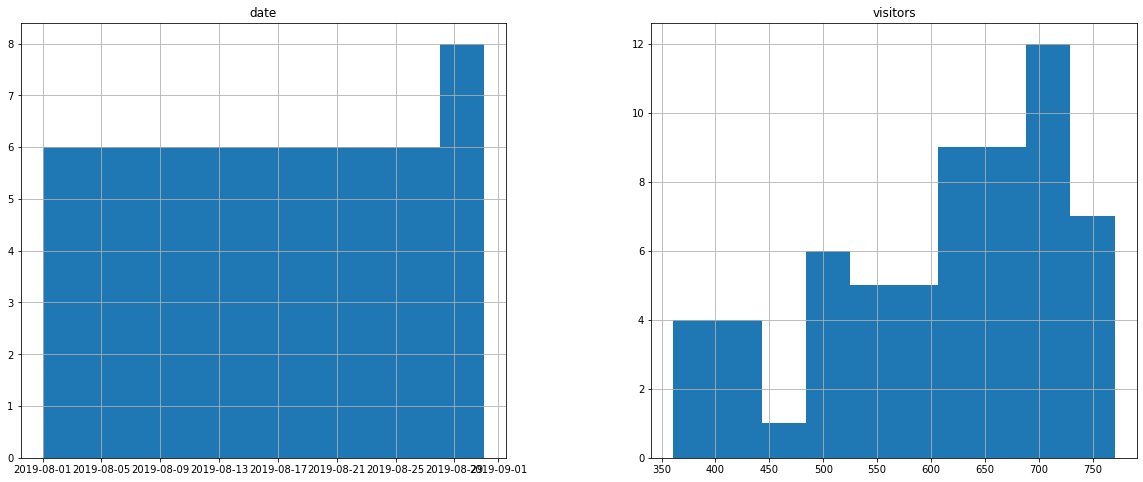

In [32]:
visitors.hist(figsize = (20, 8));

In [33]:
display(visitors['date'].unique()) # посмотрим уникальные значения столбца date
display(visitors['date'].value_counts())
display(visitors['date'].count())

array(['2019-08-01T00:00:00.000000000', '2019-08-02T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '2019-08-04T00:00:00.000000000',
       '2019-08-05T00:00:00.000000000', '2019-08-06T00:00:00.000000000',
       '2019-08-07T00:00:00.000000000', '2019-08-08T00:00:00.000000000',
       '2019-08-09T00:00:00.000000000', '2019-08-10T00:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-12T00:00:00.000000000',
       '2019-08-13T00:00:00.000000000', '2019-08-14T00:00:00.000000000',
       '2019-08-15T00:00:00.000000000', '2019-08-16T00:00:00.000000000',
       '2019-08-17T00:00:00.000000000', '2019-08-18T00:00:00.000000000',
       '2019-08-19T00:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-21T00:00:00.000000000', '2019-08-22T00:00:00.000000000',
       '2019-08-23T00:00:00.000000000', '2019-08-24T00:00:00.000000000',
       '2019-08-25T00:00:00.000000000', '2019-08-26T00:00:00.000000000',
       '2019-08-27T00:00:00.000000000', '2019-08-28

2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
Name: date, dtype: int64

62

In [34]:
display(visitors['group'].unique()) # посмотрим уникальные значения столбца group
display(visitors['group'].value_counts())
display(visitors['group'].count())

array(['A', 'B'], dtype=object)

A    31
B    31
Name: group, dtype: int64

62

In [35]:
display(visitors['visitors'].unique()) # посмотрим уникальные значения столбца visitors
display(visitors['visitors'].value_counts())
display(visitors['visitors'].count())

array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531], dtype=int64)

490    2
610    2
654    2
718    2
544    1
581    1
509    1
770    1
707    1
655    1
709    1
369    1
721    1
543    1
769    1
746    1
413    1
699    1
421    1
737    1
487    1
560    1
656    1
650    1
546    1
378    1
679    1
676    1
720    1
713    1
719    1
619    1
361    1
507    1
717    1
756    1
667    1
644    1
617    1
406    1
595    1
748    1
735    1
628    1
412    1
577    1
668    1
502    1
575    1
646    1
609    1
468    1
395    1
621    1
722    1
711    1
594    1
531    1
Name: visitors, dtype: int64

62

**Вывод:** в ходе выполнения раздела "Предобработка данных" было приведение столбцов к нижнему регистру и замена пробелов на нижний знак подчеркивания. Перевод столбцов в необходимые типы данных. Было произведено исследование на наличие явных дубликатов и пропусков значений, явные дубликаты и пропуски значений не были обнаружены. Также были изучены данные датасетов: hypothesis, orders и visitors.

# Часть 1. Приоритизация гипотез:
**Задачи:**

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Применение фреймворка ICE(сортировка по убыванию приоритета):

In [36]:
pd.options.display.max_colwidth = 120
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(1)
display(hypothesis[['ICE', 'hypothesis']].sort_values(by = 'ICE', ascending = False))

,ICE,hypothesis
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.3,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


## Применение фреймворка RICE(сортировка по убыванию приоритета):

In [37]:
hypothesis['RICE'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).astype(int)
hypothesis[['RICE', 'hypothesis', 'reach']].sort_values(by = 'RICE', ascending = False)

,RICE,hypothesis,reach
7,112,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


## Указание, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснение, почему так произошло:

В ходе выполнения раздела "Часть 1. Приоритизация гипотез" можно увидеть различия в обеих таблицах, меняется тройка лидеров, в ICE это гипотезы: "запустить акцию, дающую скидку на товар в день рождения" (первое место), "добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (второе место) и "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (третье место). А вот в RICE это гипотезы: "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (была на 3 месте), "добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (была на 5 месте), "добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (была на 2 месте). Лидер таблицы ICE - гипотеза "запустить акцию, дающую скидку на товар в день рождения	" перешла даже 5 позицию. А гипотеза 2 перешла на второе место с пятого. Такие различия связаны с тем, что в RICE учитывается параметр Reach(охват пользователей по 10-балльной шкале), а в гипотеза "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" он имеет очень высокое значение (в "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок гипотезе" он равен 10, т.е. имеет максимальное значение; во второй гипотезе: "добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" он равен 8, что тоже высоко; а вот у лидера ICE - в восьмой гипотезе: "запустить акцию, дающую скидку на товар в день рождения" он минимальный и равен 1). Следовательно, лучше всего предложить использовать для тестирования гипотезу под номером 7 ("добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"), либо может быть гипотезу под номером 2 ("добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа").

# Часть 2. Анализ A/B-теста:
**Задачи:**

Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения;
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения;
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения;
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения;
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения;
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения;
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей;
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения;
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов;
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения;
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения;
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения;
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения;
14. Примите решение по результатам теста и объясните его. Варианты решений:
        1. Остановить тест, зафиксировать победу одной из групп.
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        3. Продолжить тест.

Проверим на идентичность группы в таблицах посетителей и заказов:

In [38]:
compare_group = orders[['group']].drop_duplicates().sort_values(by = ['group']).reset_index(drop = True) == \
                visitors[['group']].drop_duplicates().sort_values(by = ['group']).reset_index(drop = True)
display(compare_group)

,group
0,True
1,True


**1. Построение графика кумулятивной выручки по группам:**

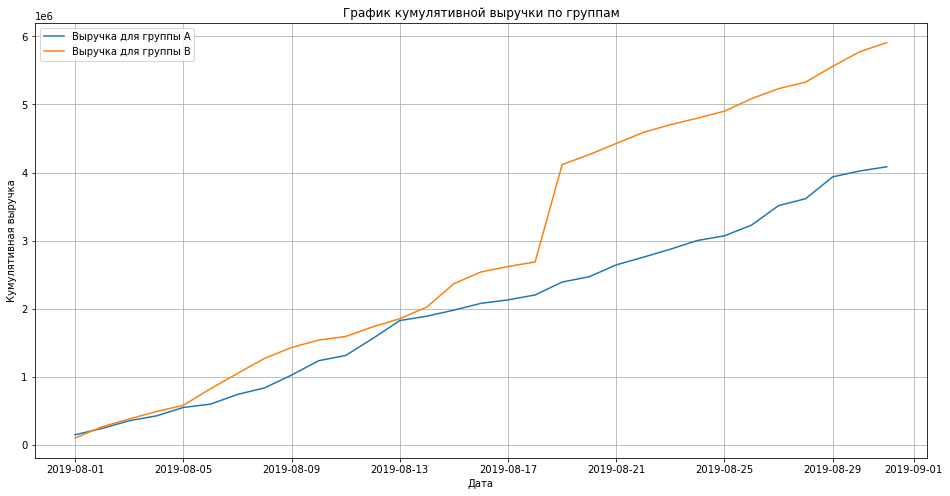

In [39]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis = 1).sort_values(by = ['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by = ['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'Выручка для группы A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'Выручка для группы B')

plt.legend();

**Вывод:** из графика можно увидеть, что 13 августа кумулятивные выручки группы A и B приблизительно равны, а далее начинается значительный рост выручки группы B, относительно группы A. Хотя до этого момента их выручки держались приблизительно на одном уровне. Можно увидеть большой рост выручки у группы B где-то 18-19 августа, это может быть связано с крупными заказами в эти дни, что и повлияло на сильный скачек кумулятивной выручки для группы B.

**2. Построение графика кумулятивного среднего чека по группам:**

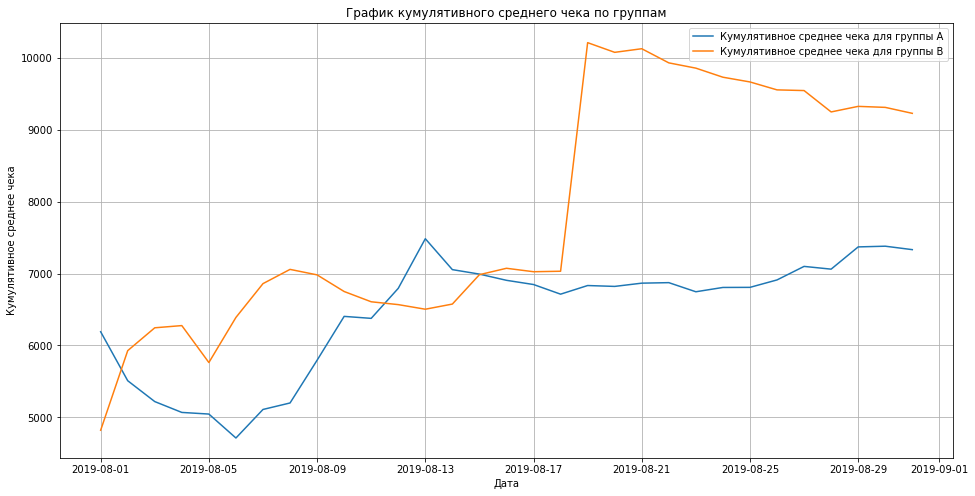

In [40]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее чека')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'Кумулятивное среднее чека для группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'Кумулятивное среднее чека для группы B')
plt.legend();

Отобразим тот же график до явного выброса:

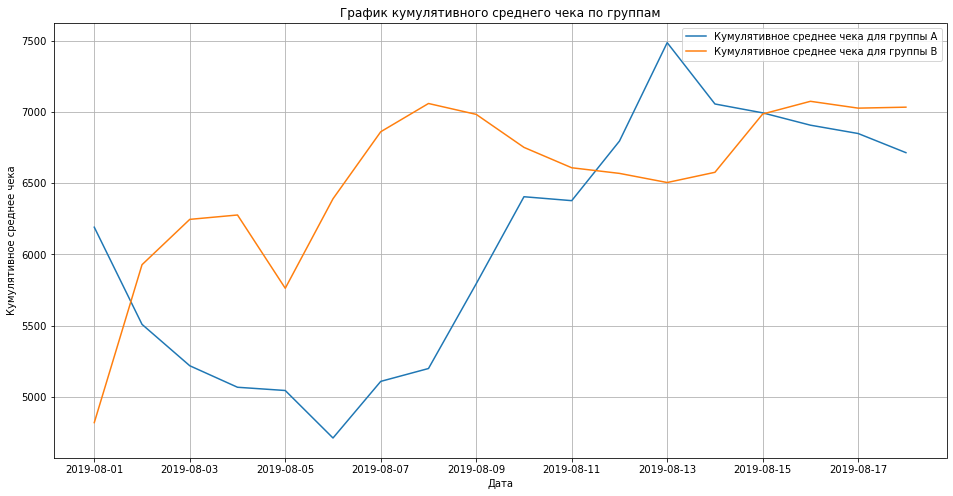

In [41]:
new_cumulativeRevenueA = cumulativeRevenueA.query('orders < 350')
new_cumulativeRevenueB = cumulativeRevenueB.query('orders < 400')

plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее чека')

plt.plot(new_cumulativeRevenueA['date'], new_cumulativeRevenueA['revenue'] / new_cumulativeRevenueA['orders'], label = 'Кумулятивное среднее чека для группы A')
plt.plot(new_cumulativeRevenueB['date'], new_cumulativeRevenueB['revenue'] / new_cumulativeRevenueB['orders'], label = 'Кумулятивное среднее чека для группы B')
plt.legend();

**Вывод:** из графика можно увидеть что, где-то до 11 августа у группы B средний чек был больше, а 11 августа значение кумулятотивного среднего чека по группам - было одинаково для группы A и B. Далее на короткий период группа A обогнала группу B. И уже после 18-19 августа произошел сильный скачек среднего чека для группы B, и до конца периода он был больше, нежели у группы A. Но также важно отметить, что со временем средний чек для группы B в итоге со временем снижался, а у группы A он незначительно плавно рос. В данном случае причиной такого роста оказался, тот же возможный пример, описанный одним пунктом ранее.

**3. Построение графика относительного изменения кумулятивного среднего чека группы B к группе A:**

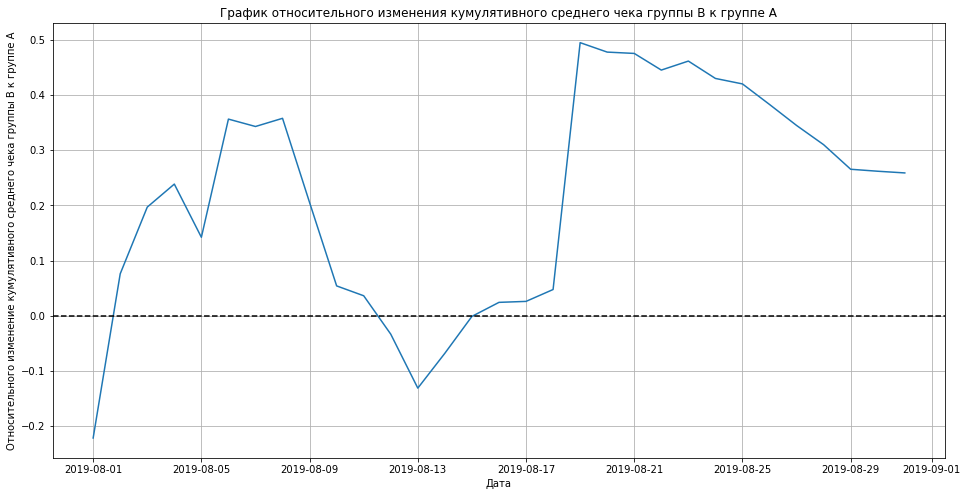

In [42]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительного изменение кумулятивного среднего чека группы B к группе A')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)

# добавляем ось X
plt.axhline(y = 0, color = 'black', linestyle = '--');

**Вывод:** из графика можно сделать вывод, средний чек группы B также рос 1 августа, а 2 августа уже даже превысил группу A и рос до 7 августа. А вот 7 и 8 августа пошло понижение до 13 августа, где принимает минимальное значение. Далее, начиная с 13 августа чек группы B начал расти и уже 15 августа, был важный момент, на следующий день чек группы B стал больше группы A, аж до конца месяца. Также видно сильный рост за счет большого заказа, с аномально большим объемом, но все же в следующие дни чек группы B постепенно снижался.

**4. Построение графика кумулятивного среднего количества заказов на посетителя по группам:**

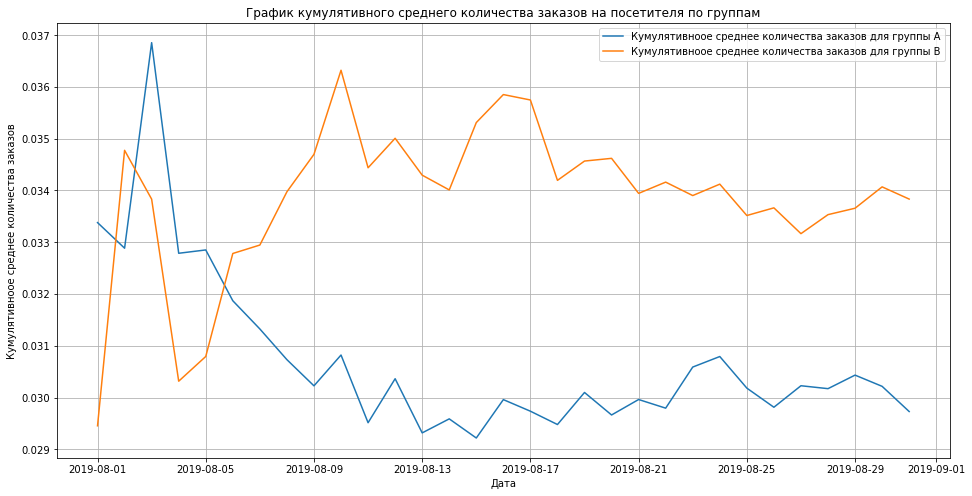

In [43]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивноое среднее количества заказов')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'Кумулятивноое среднее количества заказов для группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'Кумулятивноое среднее количества заказов для группы B')
plt.legend();

**Вывод:** из графика можно сделать вывод, что с начала месяца среднее число заказов 1-5 августа группы A была намного больше, по сравнению с группой B, что даже 3 августа она приняла максимальное значение за весь период. А вот после пика она начала сильно снижаться, а уже начиная с 9 августа стала принимать минимальные значения в районе 0,029 - 0,031. Среднее число заказов у группы B с 4 августа, наоборот, начала расти и даже 6 августа обогнала среднее число заказов группы A, и росло до 10 августа, и далее пошло постепенное снижение, с небольшим подъемом 15-17 августа. Отсюда напрашивается логичный вывод, что среднее число заказов группы B в целом намного лучше группы A, особенно начиная с 6 августа (оно постоянно выше по сравнению с другой группой).

**5. Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

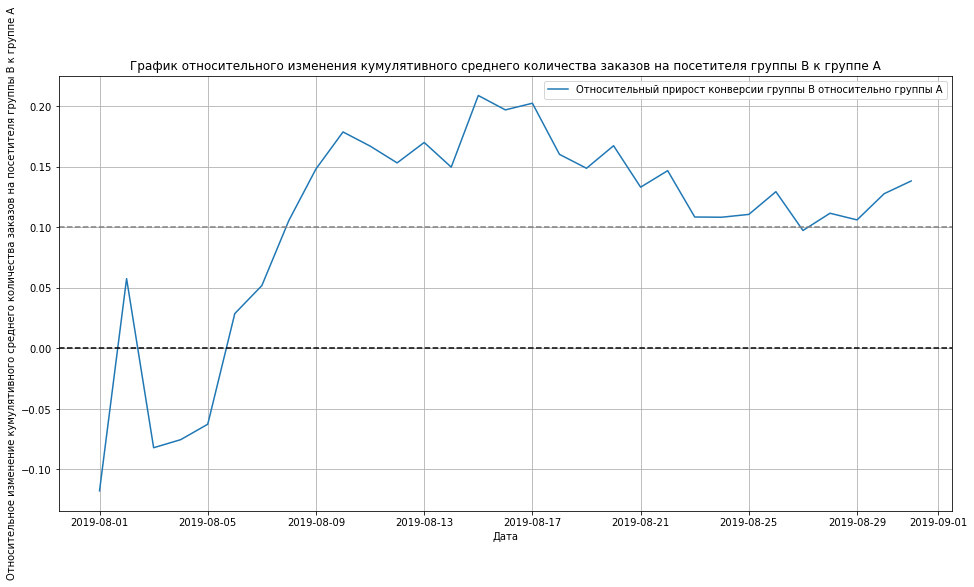

In [44]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1, label = "Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.1, color = 'grey', linestyle = '--')
plt.legend();

**Вывод:** из графика можно сделать вывод, что 1 по 5 августа несколько дней конверсия группы A была больше конверсии группы B на 5-10%. Но вот в данный период, а именно 2 августа был сильный подъем конверсии в группе B, и в итоге конверсия группы B была на 5% больше конверсии группы A. Также важно сказать, что 2 августа был сильный рост конверсий в этих двух группах, возможно, была какая-то реклама либо большие скидки. А вот начиная с 6 августа, группа B над группой A уже лидировала до конца рассматриваемого периода. Ей конверсия росла до 15 августа, и превышала конверсию группы A до 21%, затем уже опять пошло небольшое снижение, но все равно группа B лидировала.

**6. Построение точечного графика количества заказов по пользователям:**

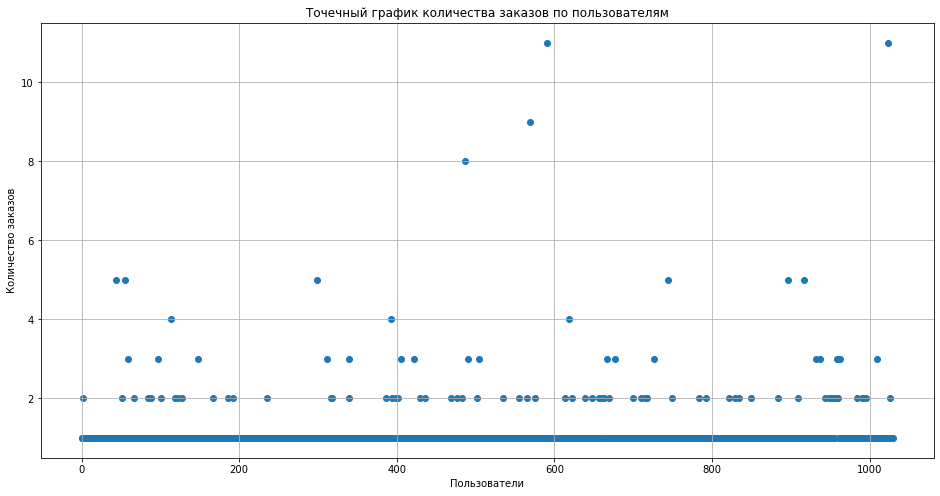

In [45]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index = False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

plt.figure(figsize = (16, 8))
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

**Вывод:** из точечного графика можно сделать вывод, что больше всего пользователей, которые совершили один заказ. Пользователей, которые совершили два заказа уже намного меньше. А тех, кто совершил три заказа, уже очень мало. А все что более  3 заказов можно считать аномалией.

**7. Подсчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей:**

In [46]:
# посчитаем выборочные перцентили количества заказов на одного пользователя
print('95-й и 99-й перцентилей количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [95, 99])) 

95-й и 99-й перцентилей количества заказов на пользователя: [2. 4.]


Для определения более точной границы аномальных пользователей, рассчитаем все процентили с 95 по 99, а также 1 и 50:

In [47]:
print(np.percentile(ordersByUsers['orders'], [1, 50, 95, 96, 97, 98, 99])) 

[1. 1. 2. 2. 2. 3. 4.]


In [48]:
border_orders = 2

**Вывод:** теперь можно увидеть, что подавляющее большинство пользователей, а именно 97 % делают от 1 до 2 заказов. Все что больше можно считать аномальными пользователями.

**8. Построение точечного графика стоимостей заказов:**

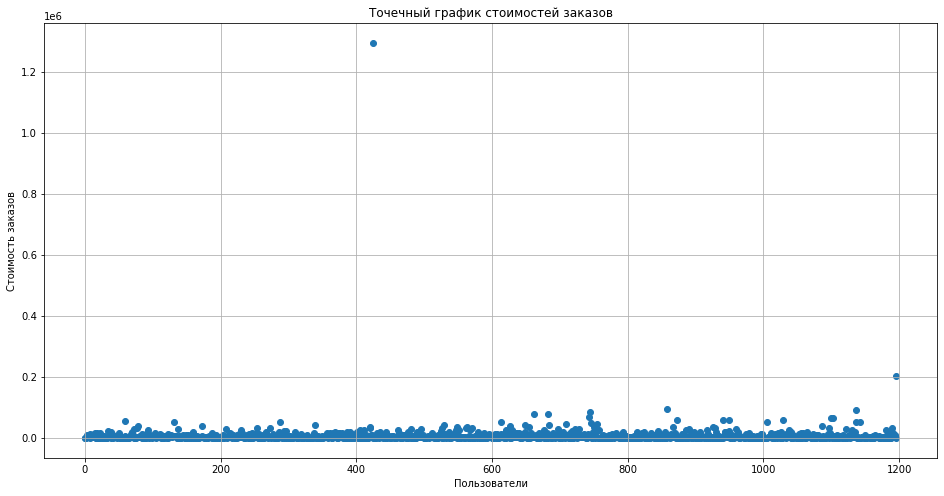

In [49]:
plt.figure(figsize = (16, 8))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 150000:

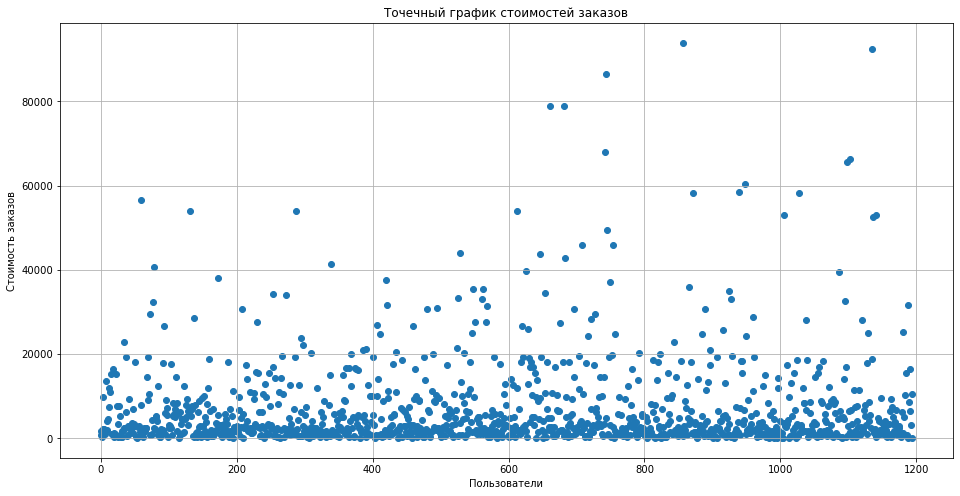

In [50]:
new_orders = orders[orders['revenue'] <= 150000]['revenue']

plt.figure(figsize = (16, 8))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

x_values = pd.Series(range(0, len(new_orders)))
plt.scatter(x_values, new_orders);

**Вывод:** из точечного графика можно сделать вывод, что заказ №425 на почти 1.3 млн и еще есть один на приблизительно 0.2 млн., остальные явно не больше 100 тысяч. 

**9. Подсчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов:**

In [51]:
print('95-й и 99-й перцентилей стоимости заказов:', np.percentile(orders['revenue'], [95, 99])) 

95-й и 99-й перцентилей стоимости заказов: [28000.  58233.2]


Для определения более точной границы аномальных заказов, рассчитаем все процентили с 95 по 99, а также 1 и 50:

In [52]:
print(np.percentile(orders['revenue'], [1, 50, 95, 96, 97, 98, 99])) 

[  100.   2978.  28000.  31382.  35485.  44133.2 58233.2]


In [53]:
border_revenue = 44000

**Вывод:** можно увидеть, более 98 % заказов до 44 тыс. Установим границу в определении аномальных заказов - все что выше 44 тыс. - аномальные заказы.

**10. Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

Подготовим данные:

In [54]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis = 1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis = 1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index = False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis = 1,
).sort_values(by = ['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index = False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis = 1,
).sort_values(by = ['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on = 'date', right_on = 'date', how = 'left'
    )
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Названия столбцов данных:
* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [55]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни:

Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд). То же делаем для sampleB и получаем:

In [56]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [57]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный показатель:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный показатель: 0.138


**Вывод:** так как p-value получился равный 0.017, что меньше alpha, который равен 0.05, следовательно нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - мы отвергаем. А относительный выигрыш группы B равен 13.8% — второе число в выводе.

**11. Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным:**

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 

А ещё найдём относительные различия в среднем чеке между группами:

In [58]:
print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print("Относительный показатель:", '{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-value: 0.729
Относительный показатель: 0.259


**Вывод:** p-value значительно больше 0.05. Так как есть значительная разница в p-value и alpha, то такое наблюдаемое различие связано с единичными выбросами. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Если p-value > alpha, то значит средний чек группы B равен среднему чеку группы A (или сильно не отличается) и он не может быть сильно выше среднего чека группы А.

**12. Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 20 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 20 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [59]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > border_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > border_orders]['userId'],
    ],
    axis = 0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > border_revenue]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
40


Всего 40 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [60]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index = np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index = np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [61]:
print("p-value:", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель:", '{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))

p-value: 0.007
Относительный показатель: 0.185


**Вывод:** p-value равно 0.007, что меньше alpha равное 0.05. Следовательно, можно отвергнуть нулевую гипотезу, которая говорит о том, что статистически значимых различий в конверсии между группами нет. Это характеризует, то что по «очищенным» данным различия в конверсии групп A и B есть. А относительный показатель группы B над группой A равен 18,5% это выше, чем с «сырыми» данными, там он равен 13.8%.

**13. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным:**

In [62]:
print("p-value:", 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный показатель:", 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.994
Относительный показатель: 0.037


**Вывод:** p-value значительно увеличился с 0.729 до 0.994, но и разница между сегментами сократилась с 26% до 4%. Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста!
p-value значительно больше 0.05, оно равно 994. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, тоже нет (как и с "сырыми" данными).

**14. Принятие решения по результатам теста и объяснение его:**

В результате проведенного исследования было выявлено, что:
* по "сырым" и по "очищенным" данным есть различия в конверсии группы A и группы B (относительный показатель по "очищенным" данным группы B над A равен для 18,5%, а по "сырым" данным равен 13.8%; разница между ними равна 4.7%);
* по "сырым" и по "очищенным" данным различия в средних чеках групп A и B есть небольшие, это связано с аномально большим заказом на 1.3 млн, проведенные тесты показывают, что мы не можем утверждать, что эти различия неслучайны.

Можно увидеть, что данные по среднему чеку еще не постоянны, если в первую очередь важен этот показатель, то тест необходимо продолжить. Если больше важна конверсия, то тест можно будет прекращать. Так как гипотеза об увлечении конверсии подтвердилась. Если важны оба показателя, то все же я бы посоветовал продолжить тест.

По результатам тестирования можно сделать выводы, что можно остановить тестирование и констатировать превосходство группы B над группой A по конверсии, хотя по среднему чеку группы приблизительно равны.

# Общий вывод:
В ходе проделанной работы, можно сказать, что наиболее подходящая гипотеза для увеличении выручки: "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так как данная гипотеза будет иметь наибольший охват людей, и сильно повлияет на пользователей, а требует не очень больших ресурсов.

Также можно сделать следующие общие выводы:
* есть статистически значимые различия по конверсии между группами по «сырым» и "очищенным" данным;
* нет статистически значимого различия по среднему чеку между группами по «сырым» и "очищенным" данным;
* результаты группы B по конверсии, превосходит группу A, и данные показывают, что нет причин для ухудшению результатов;
* если брать данные без аномальных значений, то средний чек у групп не отличается.